In [ ]:
import re
import spacy
import string
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [12]:
!spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.9 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [13]:
nlp = spacy.load('en_core_web_sm')

In [14]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1': 'label', 'v2': 'text'})
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None


In [18]:
print(df['label'].value_counts())

0    4825
1     747
Name: label, dtype: int64


In [19]:
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

In [20]:
df['processed_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['label'], test_size=0.2, random_state=42
)

In [22]:
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [23]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [24]:
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
y_pred_nb_count = nb_count.predict(X_test_count)

# Train a Naive Bayes classifier with TF-IDF features
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_tfidf.predict(X_test_tfidf)

In [25]:
svm_count = SVC(random_state=42)
svm_count.fit(X_train_count, y_train)
y_pred_svm_count = svm_count.predict(X_test_count)

# Train an SVM classifier with TF-IDF features
svm_tfidf = SVC(random_state=42)
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm_tfidf.predict(X_test_tfidf)

In [26]:
def evaluate_model(y_true, y_pred, model_name, feature_extraction):
    """
    Evaluates the performance of a classification model using various metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    print(f"\nModel: {model_name} with {feature_extraction}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)

    # Visualize the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name} ({feature_extraction})')
    plt.show()



Model: Naive Bayes with CountVectorizer
Accuracy: 0.9848
Precision: 0.9650
Recall: 0.9200
F1-score: 0.9420
Confusion Matrix:
[[960   5]
 [ 12 138]]


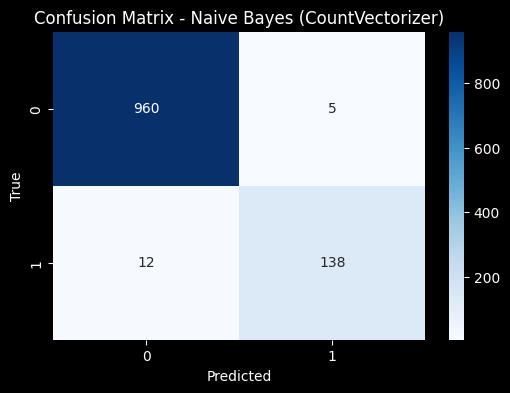


Model: Naive Bayes with TF-IDF
Accuracy: 0.9677
Precision: 1.0000
Recall: 0.7600
F1-score: 0.8636
Confusion Matrix:
[[965   0]
 [ 36 114]]


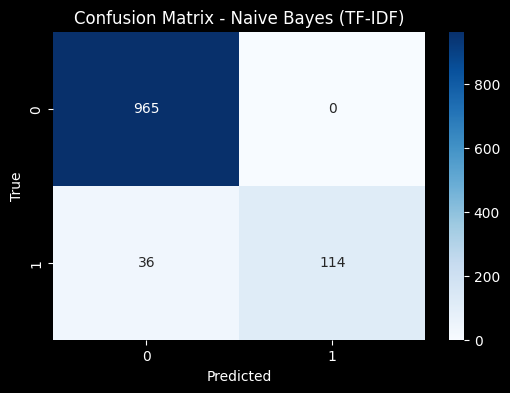


Model: SVM with CountVectorizer
Accuracy: 0.9812
Precision: 1.0000
Recall: 0.8600
F1-score: 0.9247
Confusion Matrix:
[[965   0]
 [ 21 129]]


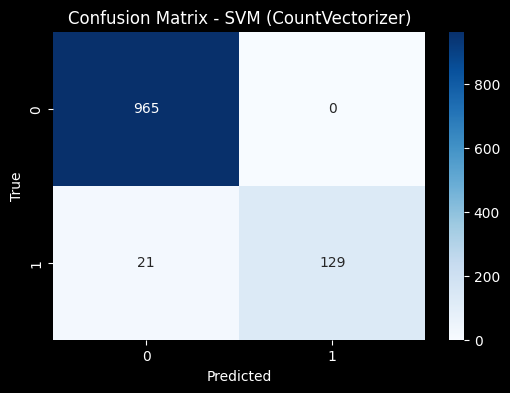


Model: SVM with TF-IDF
Accuracy: 0.9767
Precision: 0.9769
Recall: 0.8467
F1-score: 0.9071
Confusion Matrix:
[[962   3]
 [ 23 127]]


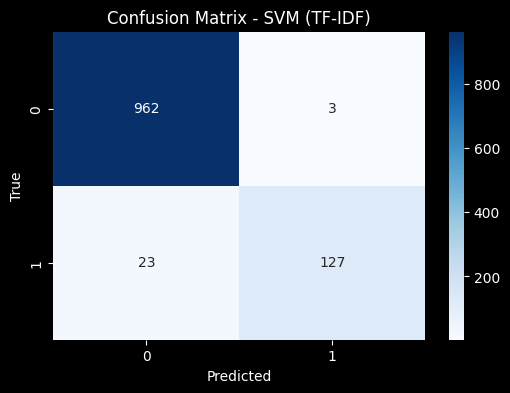

In [27]:
evaluate_model(y_test, y_pred_nb_count, 'Naive Bayes', 'CountVectorizer')
evaluate_model(y_test, y_pred_nb_tfidf, 'Naive Bayes', 'TF-IDF')
evaluate_model(y_test, y_pred_svm_count, 'SVM', 'CountVectorizer')
evaluate_model(y_test, y_pred_svm_tfidf, 'SVM', 'TF-IDF')